<a href="https://colab.research.google.com/github/rnrl/newworld/blob/main/bitcoinAutoTradePredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 19.1 MB/s 


In [3]:
import pyupbit

In [4]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60")
df

,open,high,low,close,volume,value
2022-03-01 01:00:00,49638000.0,50124000.0,49375000.0,49720000.0,1134.892262,5.649971e+10
2022-03-01 02:00:00,49704000.0,50124000.0,49399000.0,50124000.0,409.769086,2.037385e+10
2022-03-01 03:00:00,50124000.0,50266000.0,49851000.0,49982000.0,301.645784,1.511234e+10
2022-03-01 04:00:00,49982000.0,50220000.0,49874000.0,50180000.0,153.685034,7.695329e+09
2022-03-01 05:00:00,50176000.0,50900000.0,50123000.0,50829000.0,338.284712,1.709738e+10
...,...,...,...,...,...,...
2022-03-09 04:00:00,48082000.0,48273000.0,47878000.0,48251000.0,105.950994,5.094885e+09
2022-03-09 05:00:00,48223000.0,48397000.0,47903000.0,48026000.0,73.513110,3.537099e+09
2022-03-09 06:00:00,48023000.0,48084000.0,47880000.0,48057000.0,64.880263,3.112978e+09
2022-03-09 07:00:00,48039000.0,48220000.0,47993000.0,48111000.0,108.894305,5.236142e+09


In [5]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-03-01 01:00:00,49720000.0
1,2022-03-01 02:00:00,50124000.0
2,2022-03-01 03:00:00,49982000.0
3,2022-03-01 04:00:00,50180000.0
4,2022-03-01 05:00:00,50829000.0
...,...,...
195,2022-03-09 04:00:00,48251000.0
196,2022-03-09 05:00:00,48026000.0
197,2022-03-09 06:00:00,48057000.0
198,2022-03-09 07:00:00,48111000.0


In [6]:
#prophet 불러옴
from fbprophet import Prophet

In [7]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [8]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

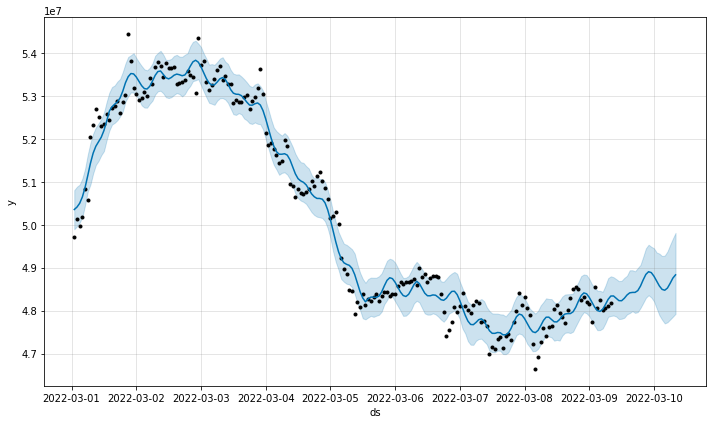

In [9]:
#그래프1
fig1 = model.plot(forecast)

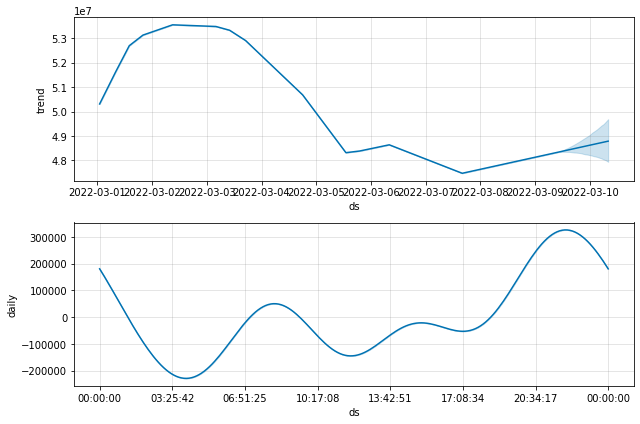

In [10]:
#그래프2
fig2 = model.plot_components(forecast)

In [11]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

48210000.0

In [12]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

48341735.610531114

In [13]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  48210000.0
종가의 가격:  48341735.610531114
